# Wake Flow

[![Google Collab Book](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/tum-pbs/PhiFlow/blob/develop/examples/grids/Wake_Flow.ipynb)


This example shows the turbulence that forms behind a cyllinder on a 3D grid with uniformly stretched cells.
We set a fluid inflow on the left side and add a cylinder to the domain.

In [ ]:
%pip install phiflow
from phi.torch.flow import *
# from phi.flow import *  # If JAX is not installed. You can use phi.torch or phi.tf as well.
from tqdm.notebook import trange

c:\ProgramData\Anaconda3\envs\phiflow2\lib\site-packages\phiml\math\_shape.py:2048: RuntimeWarning: Stacking shapes with incompatible item names will result in item names being lost. For vector Got ('x', 'y') and ('x', 'z')
  warnings.warn(f"Stacking shapes with incompatible item names will result in item names being lost. For {name} Got {item_names[index]} and {items}", RuntimeWarning)


<Figure size 864x360 with 2 Axes>

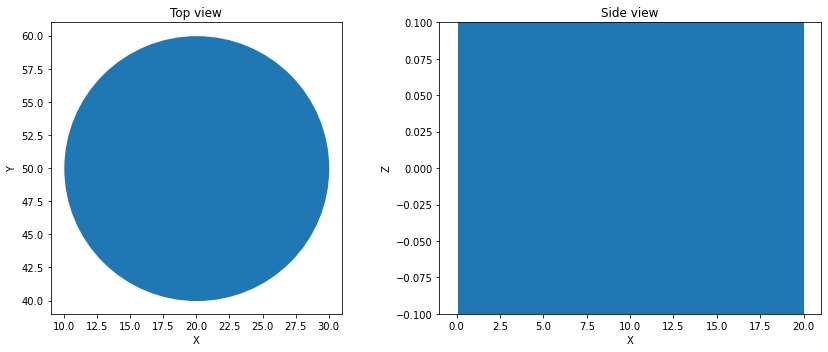

In [16]:
cylinder = geom.infinite_cylinder(x=20, y=50, radius=10, inf_dim='z')
plot({"Top view": cylinder['x,y'], "Side view": cylinder['x,z']})

Next, we define the simulation function and set the boundary conditions, resolution, and domain size.
We then run the simulation for 200 time steps with $\Delta t=1$.

In [ ]:
@jit_compile
def step(v, p, dt=1.):
    v = advect.semi_lagrangian(v, v, dt)
    return fluid.make_incompressible(v, cylinder, Solve(x0=p))

boundary = {'x-': vec(x=2, y=0, z=0), 'x+': ZERO_GRADIENT, 'y': PERIODIC, 'z': PERIODIC}
v0 = StaggeredGrid((8., 0, 0), boundary, x=128, y=64, z=8, bounds=Box(x=200, y=100, z=5))
v0, p0 = fluid.make_incompressible(v0, cylinder, Solve('scipy-direct'))
v_trj, p_trj = iterate(step, batch(time=200), v0, p0, range=trange)

Let's look at the vorticity of a z cross section over time!

In [28]:
v_trj_2d = v_trj[{'z': 4, 'vector': 'x,y'}]
plot(v_trj_2d.time[100:].curl(), animate='time')

We can also visualize the velocity field using stream lines.

<Figure size 864x360 with 1 Axes>

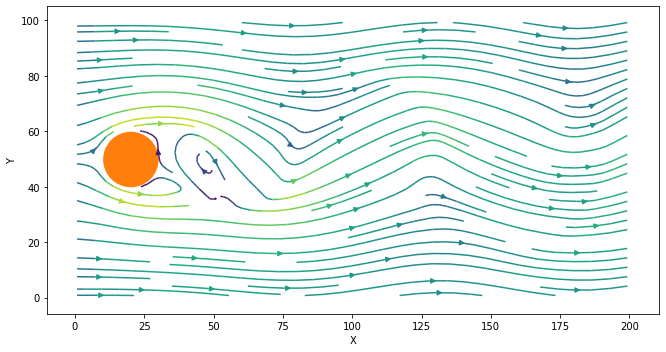

In [26]:
plot(v_trj_2d.time[-1], cylinder['x,y'], overlay='args')